# Introduction to Data Science and AI, Sofia, 2023

# Assignment 5: Data Science Revision

*Submission by Dragomir Proychev*

***

*__Download some data sets from Our World in Data, e.g. related to happiness and life
satisfaction, trust, corruption, etc__*

- *__Think of several meaningful questions that can be answered with these data, make several informative visualisations to answer those questions. State any assumptions and motivate decisions that you make when selecting data to be plotted, and in combining data.__*
- *__Discuss any observations that you make, or insights obtained, from the data visualisations.__*

***

We'll be looking at the `Human Development Index vs. Corruption Perception Index` set from https://ourworldindata.org .

Let's start off by importing the data for the assignment.

In [1]:
import pandas as pd

df = pd.read_csv('data/human-development-index-vs-corruption-perception-index.csv')

df

,Entity,Code,Year,Human Development Index,Corruption Perception Index - Transparency International (2018),Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1990,0.273,NaN,10694804.0,NaN
2,Afghanistan,AFG,1991,0.279,NaN,10745168.0,NaN
3,Afghanistan,AFG,1992,0.287,NaN,12057436.0,NaN
4,Afghanistan,AFG,1993,0.297,NaN,14003764.0,NaN
...,...,...,...,...,...,...,...
58615,Zimbabwe,ZWE,1985,NaN,NaN,8690516.0,NaN
58616,Zimbabwe,ZWE,1986,NaN,NaN,8983048.0,NaN
58617,Zimbabwe,ZWE,1987,NaN,NaN,9277484.0,NaN
58618,Zimbabwe,ZWE,1988,NaN,NaN,9568745.0,NaN


The file contains information about the Human Development Index and the Corruption Perception Index in different countries throughout the years.

We can examine the data to determine whether there is a correlation between the two metrics - this will help us understand whether countries with better standards of living have lower perceived levels of corruption.

Let's start by pin pointing which year the most recent data is from.

In [2]:
df['Year'].max()

2021

An observation that we can make is, that even though the most recent year in the dataset is 2021, the Corruption Perception Index seems to be restricted up to the year 2018, based on the column name.

Let's verify if this is the case.

In [3]:
df[~df['Corruption Perception Index - Transparency International (2018)'].isna()]['Year'].max()

2018

It seems that if we want to correlate the Human Development Index, to the Corruption Perception Index, the most recent data that we can use is from 2018.

Let's do just that. We can start by preparing the data.

In [4]:
def build_test_df():
    test_df = df[
        (df['Year'] == 2018) & 
        (~df['Human Development Index'].isna()) & 
        (~df['Corruption Perception Index - Transparency International (2018)'].isna())
    ]
    
    return test_df
    
test_df = build_test_df()

Let's continue by drawing a box plot for each attribute, so we can get a better idea for the distribution of the data.

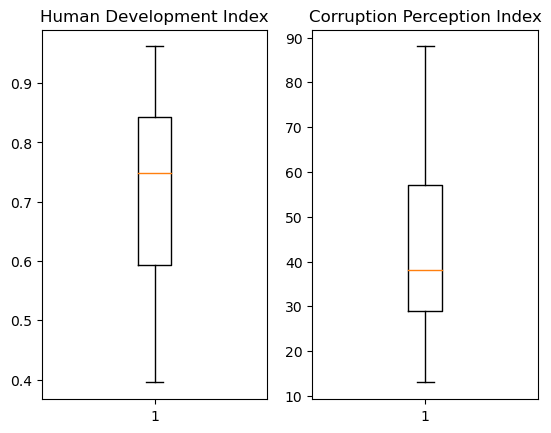

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2)

axs[0].boxplot(test_df['Human Development Index'])
axs[0].set_title('Human Development Index')

axs[1].boxplot(test_df['Corruption Perception Index - Transparency International (2018)'])
axs[1].set_title('Corruption Perception Index')

plt.show()

It seems like the data is evenly distributed for both metrics, with no significant outliers.

Let's plot the data, to see how the Human Development Index is correlated to the Corruption Perception Index.

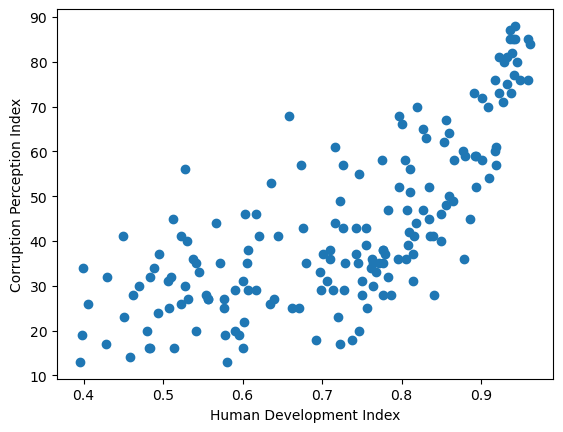

In [6]:
plt.scatter(
    test_df['Human Development Index'],
    test_df['Corruption Perception Index - Transparency International (2018)'],
)

plt.xlabel('Human Development Index')
plt.ylabel('Corruption Perception Index')

plt.show()

There seems to be a strong correlation between the two attributes - the data indicates that countries with better standards of living have lower perceived levels of corruption.

Next up, we can we can try to determine whether there are common patterns for countries within the same geographical region by grouping them by continent.

Unfortunately, we can notice that the Continent attribute for many records is missing. Upon further inspection, we can notice that it's present for some years and absent for others - we can easily remedy this by doing some data cleaning.

In [7]:
df.sort_values(['Code', 'Continent'], inplace=True)
df['Continent'] = df['Continent'].fillna(method='ffill')

In [8]:
df.sort_values(['Code', 'Continent'], inplace=True)
df['Continent'] = df['Continent'].fillna(method='ffill')

We can rebuild our test data frame and plot the data.

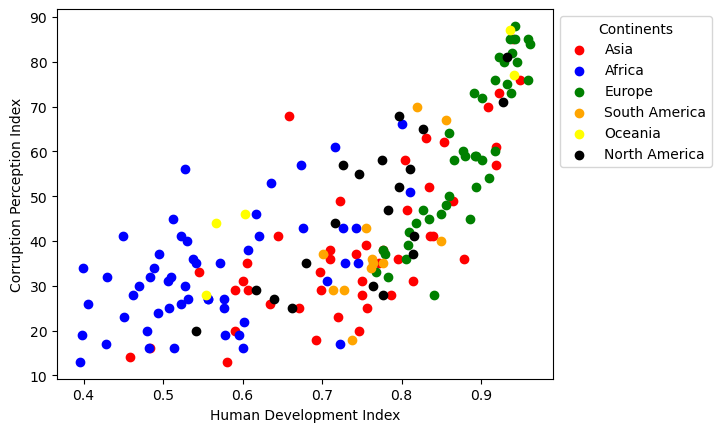

In [9]:
test_df = build_test_df()

colors = {
    'Asia': 'red',
    'Africa': 'blue',
    'Europe': 'green',
    'North America': 'black',
    'South America': 'orange',
    'Oceania': 'yellow'
}

continents = test_df['Continent'].unique()

for continent in continents:
    plt.scatter(
        test_df[test_df['Continent'] == continent]['Human Development Index'],
        test_df[
            test_df['Continent'] == continent
        ]['Corruption Perception Index - Transparency International (2018)'],
        c = colors[continent],
    )

plt.xlabel('Human Development Index')
plt.ylabel('Corruption Perception Index')

plt.legend(continents, title='Continents', bbox_to_anchor=(1, 1))

plt.show()

Based on our observations, we can deduce that:
- Countries in Africa as a whole have high perceived corruption and low living standards.
- Countries in Europe have a high living standards and varying levels of perceived corruption.
- Countries in Asia and North America have datapoints on both end of the spectrum.

Another interesting thing to observe would be how the Corruption Perception Index and the Human Development index have changed through the years for one of the datapoints which is at the bottom end of the spectrum. Let's inspect the country with the lowest standard of living and highest perceived corruption.

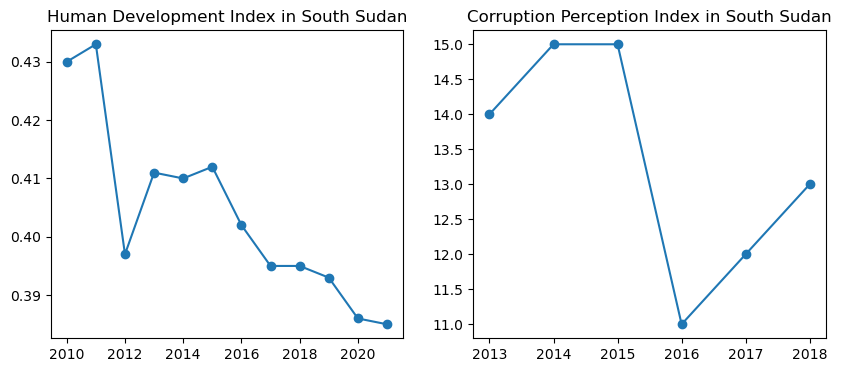

In [10]:
country = test_df[test_df['Human Development Index'] == test_df['Human Development Index'].min()]
country = country['Entity'].iloc[0]
country_df = df[df['Entity'] == country].sort_values(by=['Year'])

human_index_df = country_df[~country_df['Human Development Index'].isna()]
corruption_index_df = country_df[
    ~country_df['Corruption Perception Index - Transparency International (2018)'].isna()
]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(human_index_df['Year'], human_index_df['Human Development Index'], 'o-')
axs[0].set_title(f'Human Development Index in {country}')

axs[1].plot(
    corruption_index_df['Year'],
    corruption_index_df['Corruption Perception Index - Transparency International (2018)'],
    'o-'
)
axs[1].set_title(f'Corruption Perception Index in {country}')

plt.show()

Unfortunately, the data we have for South Sudan is very limited. Still, we can observe that the standards of living there have been low for quite a while.

***

*__Investigate whether clustering can be used to identify volcanoes that lie on the same
tectonic plate boundary.__*

*__You might start by retrieving the latitude and longitude of volcanoes from Wikidata.__*

***

First of let's start by retrieving geo information about the boundaries of all tectonic plates.

We can retrieve such data from https://github.com/fraxen/tectonicplates/tree/master/GeoJSON

Let's import the data and visualize it.

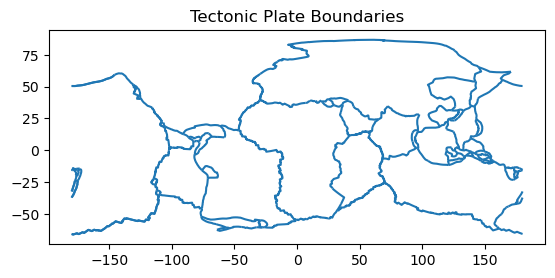

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

geojson_file = 'data/PB2002_boundaries.json'

tectonic_plates = gpd.read_file(geojson_file)
tectonic_plates.plot()

plt.title('Tectonic Plate Boundaries')
plt.show()

Next up, let's fetch some geo data about volcanoes from WikiData, using a SPARQL query.

In [12]:
import requests
import re
from shapely.geometry import Point
from shapely import wkt

sparql_endpoint = "https://query.wikidata.org/sparql"
sparql_query = """
SELECT ?volcano ?volcanoLabel ?coord
WHERE {
  ?volcano wdt:P31 wd:Q8072;  # Instance of volcano
          wdt:P625 ?coord.   # Coordinates of the volcano
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(sparql_endpoint, params={'query': sparql_query, 'format': 'json'}, headers=headers)

query_result = response.json()

After careful examination of the result, we can notice that the formatting for the coordinates of the volcanoes is inconsistent. Let's clean the data.

In [13]:
point_pattern = r'Point\(([^)]+)\)'

for result in query_result['results']['bindings']:
    point = re.search(point_pattern, result['coord']['value'])

    if point:
        result['coord']['value'] = point.group(0)
    else:
        result['coord']['value'] = None

Now that we've cleaned the data, let's plot it, to better visualize the dataset.

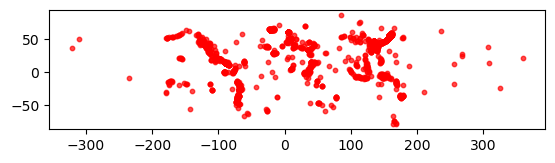

In [14]:
volcanoes = gpd.GeoDataFrame.from_features([
    {
        'type': 'Feature',
        'geometry': wkt.loads(result['coord']['value']),
        'properties': {
            'Volcano': result['volcanoLabel']['value'],
        }
    }
    for result in query_result['results']['bindings']
])

volcanoes = volcanoes.dropna(subset=['geometry'])

volcanoes.plot(marker='o', color='red', markersize=10, alpha=0.7)

plt.show()

We can now plot the data against the tectonic boundaries as well.

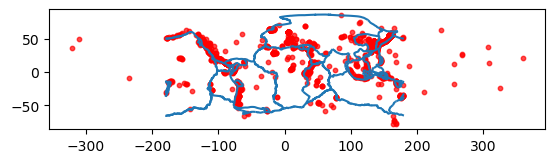

In [15]:
ax = tectonic_plates.plot()
volcanoes.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7)

plt.show()

Based on this visualization, we can definitely see that there are clusters of volanoes along the tectonic boundaries.

Let's try to use machine learning to identify them!

We can start by trying out the KMeans algorithm. To begin with, we'll find the best value for K by using the elbow method.

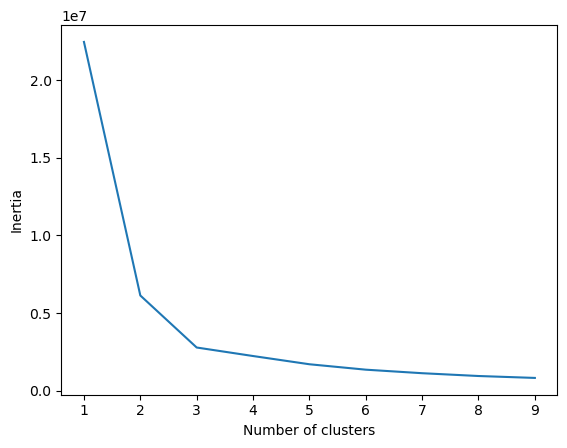

In [16]:
from sklearn.cluster import KMeans

inertia = {}

for k in range(1, 10):
    model = KMeans(n_clusters=k, n_init=10).fit(volcanoes.get_coordinates())
    inertia[k] = model.inertia_

plt.figure()

plt.plot(list(inertia.keys()), list(inertia.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

plt.show()

Based on our observations, the most appropriate value for K seems to be 3.

Let's visualize the clusters for K = 3 by using a scatter plot.

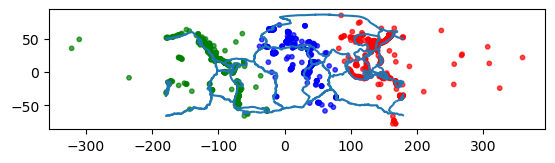

In [17]:
model = KMeans(n_clusters=3, n_init=10)

labels = model.fit_predict(volcanoes.get_coordinates())

colors = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

ax = tectonic_plates.plot()
volcanoes.plot(
    ax=ax,
    marker='o',
    color=list(map(lambda label: colors[label], labels)),
    markersize=10,
    alpha=0.7
)

plt.show()

The algorithm seems to have done a decent enough job, but we can probably do better.

Let's try using DBSCAN instead.

Let's start off by determining the minimum number of samples and maximum distance between two samples for our model.

- We are working on a two dimensional dataset, so using the recommended formula of `MinPts = 2 * D` , we can deduce that a value of 4 would be appropriate for the minimum number of samples.
- To determine an appropriate value for the maximum distance between two samples, we can plot the sorted values of a k-distance graph where `k = MinPts` and identify the elbow of the plot.

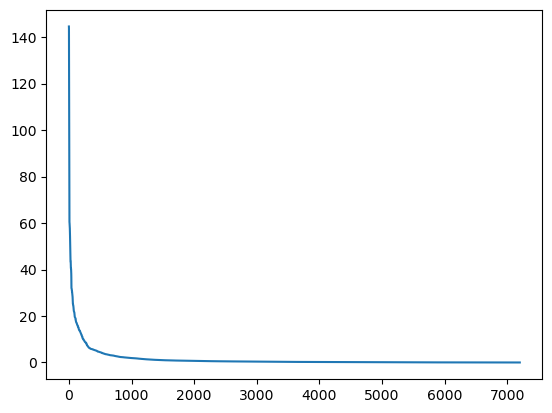

In [18]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

from sklearn.neighbors import kneighbors_graph

distances = kneighbors_graph(volcanoes.get_coordinates(), 4, mode='distance').data
distances = np.sort(distances)[::-1]
plt.plot(distances)

plt.show()

Based on our observations, we can use a value of 20 for the maximum distance between two samples.

Let's run a DBSCAN model and plot out the clusters.

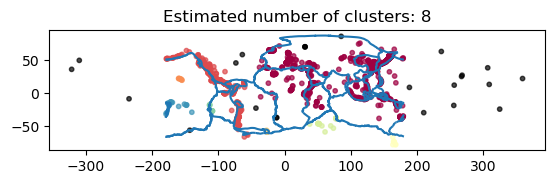

In [19]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=20, min_samples=4).fit(volcanoes.get_coordinates())
labels = model.labels_

def get_color_for_label(label, colors):
    black_color = [0, 0, 0, 1]

    if label == -1:
        return black_color
    
    return tuple(colors[label])

unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

ax = tectonic_plates.plot()
volcanoes.plot(
    ax=ax,
    marker='o',
    color=list(map(lambda label: get_color_for_label(label, colors), labels)),
    markersize=10,
    alpha=0.7
)

num_clusters = labels.max() + 1

plt.title(f'Estimated number of clusters: {num_clusters}')

plt.show()

Seems like a decent enough result, though the KMeans algorithm seems to have performed better.